<a href="https://colab.research.google.com/github/Partha-deuri/learn_pytorch/blob/main/simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [29]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

class RNN(nn.Module):
    # nn.RNN
    def  __init__(self,input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1) #1,57

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor,hidden_tensor),1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1,self.hidden_size)

category_lines, all_categories = load_data()
n_categories = len(all_categories)
# print(n_categories)

n_hidden = 128

rnn = RNN(N_LETTERS, n_hidden, n_categories)

#one step

input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor,hidden_tensor)

# print(output.size())
# print(next_hidden.size())

#whole seq/ names
input_tensor = line_to_tensor('Albert')

output, next_hidden = rnn(input_tensor[0],hidden_tensor)

# print(output.size())
# print(next_hidden.size())

#

def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

# print(category_from_output(output))


#
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(),lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()

    for i in range(line_tensor.size()[0]):
        output , hidden = rnn(line_tensor[i],hidden)

    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()


4999 2.4995 2.3912 Allcock / Czech WRONG (English)
9999 4.9995 0.5704 Sault / French CORRECT
14999 7.4995 0.6922 Wang / Korean CORRECT
19999 9.9995 0.5979 Koo / Korean CORRECT
24999 12.4995 0.3482 Favreau / French CORRECT
29999 14.9995 2.0498 Craig / Korean WRONG (Scottish)
34999 17.4995 1.7516 Close / Scottish WRONG (Greek)
39999 19.9995 2.1399 Fraser / English WRONG (Scottish)
44999 22.4995 2.2867 Abano / Portuguese WRONG (Spanish)
49999 24.9995 0.6397 Peatain / Irish CORRECT
54999 27.4995 0.3139 Nosek / Polish CORRECT
59999 29.9995 0.2510 Furusawa / Japanese CORRECT
64999 32.4995 1.4963 Milligan / Irish CORRECT
69999 34.9995 0.9668 Rojo / Spanish CORRECT
74999 37.4995 3.9507 Schermer / German WRONG (Dutch)
79999 39.9995 0.8035 Klerk / Dutch CORRECT
84999 42.4995 1.5995 Kaza / Portuguese WRONG (Japanese)
89999 44.9995 2.9879 Kalb / Scottish WRONG (Arabic)
94999 47.4995 0.0193 O'Reilly / Irish CORRECT
99999 49.9995 1.8773 Wilkes / Greek WRONG (English)
104999 52.4995 0.0071 Bekhteev /

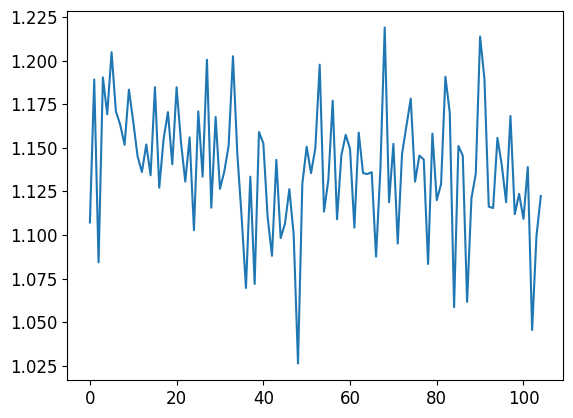

In [34]:

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000,5000
n_iters = 200000
for  i in range(n_iters+1):
    category, line, category_tensor, line_tensor = random_training_example(category_lines,all_categories)
    output, loss = train(line_tensor,category_tensor)

    current_loss +=loss

    if (i)% plot_steps  == 0:
        all_losses.append(current_loss/plot_steps)
        current_loss = 0

    if(i)% print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i} {(i/n_iters *100):.4f} {loss:.4f} {line} / {guess} {correct}")
        if loss < 0.01:
            break
plt.figure()
plt.plot(all_losses)
plt.show()



In [35]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)

        hidden = rnn.init_hidden()

        for i in range(line_tensor.size()[0]):
            output , hidden = rnn(line_tensor[i],hidden)

        guess = category_from_output(output)

        print(guess)


# while True:
#     sentence = input("Input : ")
#     if sentence == "quit":
#         break
#     predict(sentence)

In [39]:
predict("Partha")


> Partha
Czech


In [20]:
rnn.parameters()

<generator object Module.parameters at 0x7da71cd90eb0>
